[网址](https://www.kaggle.com/kumaml/kuma-house-price-predict)。

分数：$0.12203$。


1、画回归图；

2、画分布图；


3、`&` 左右是两个布尔型变量，用法：

```python
IsMatched = (df_train['GrLivArea'] > 800) & (df_train['GrLivArea'] < 2500)
```

4、去除离群点。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

datapath = '../input/'
df_train = pd.read_csv(datapath + 'train.csv')
df_test = pd.read_csv(datapath + 'test.csv')

In [2]:
df_train.shape

(1460, 81)

In [3]:
df_test.shape

(1459, 80)

In [4]:
# 这两部分是训练和提交的时候要用到的
ids = df_test['Id']
y_train = np.log1p(df_train['SalePrice']) # 数据平滑处理

In [5]:
df_train = df_train.drop(['Id', 'SalePrice'], axis=1)
df_test = df_test.drop(['Id'], axis=1)

## EDA

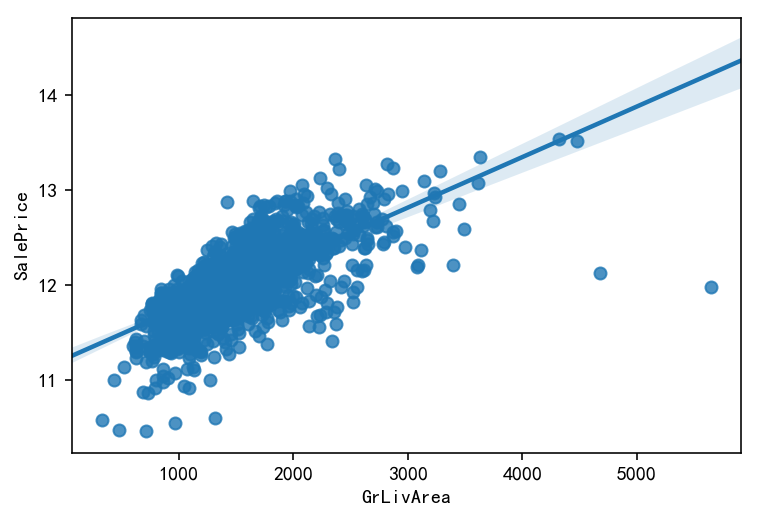

In [6]:
import seaborn as sns

sns.regplot(x=df_train['GrLivArea'], y=y_train)
plt.show()

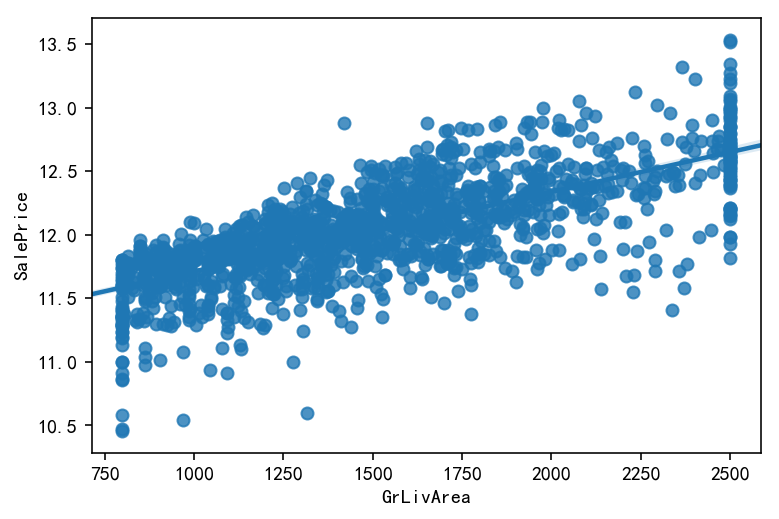

In [7]:
# clip 裁剪，这里是去除离群点的意思
df_train['GrLivArea'] = df_train['GrLivArea'].clip(800, 2500)
sns.regplot(x=df_train['GrLivArea'], y=y_train)
plt.show()

In [8]:
# & 左右是两个布尔型变量
IsMatched = (df_train['GrLivArea'] > 800) & (df_train['GrLivArea'] < 2500)
IsMatched.head()

0    True
1    True
2    True
3    True
4    True
Name: GrLivArea, dtype: bool

In [9]:
# 去除离群点
df_train = df_train[IsMatched]
y_train = y_train[IsMatched]

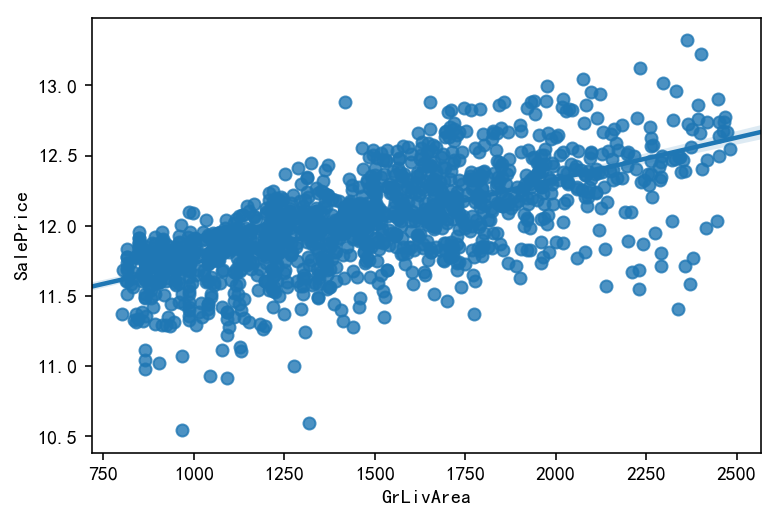

In [10]:
sns.regplot(x=df_train['GrLivArea'], y=y_train)
plt.show()

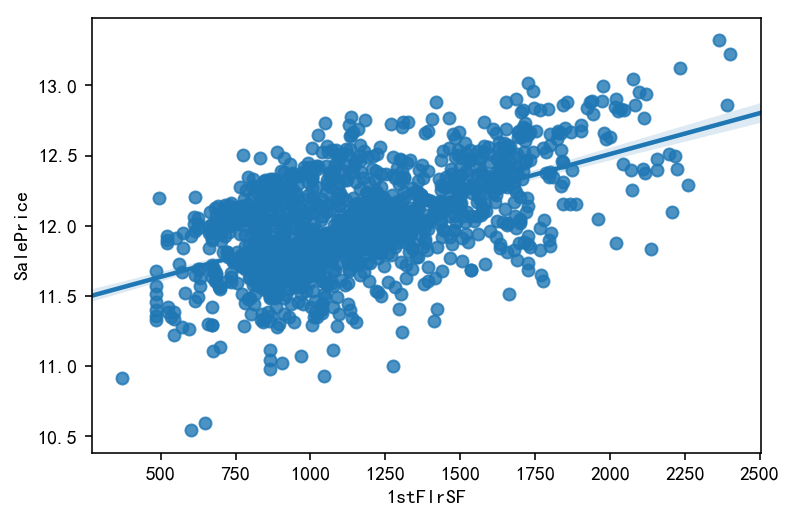

In [11]:
sns.regplot(x=df_train['1stFlrSF'], y=y_train)
plt.show()

In [12]:
IsMatched = (df_train['1stFlrSF'] > 500) & (df_train['1stFlrSF'] < 2250)
df_train = df_train[IsMatched]
y_train = y_train[IsMatched]

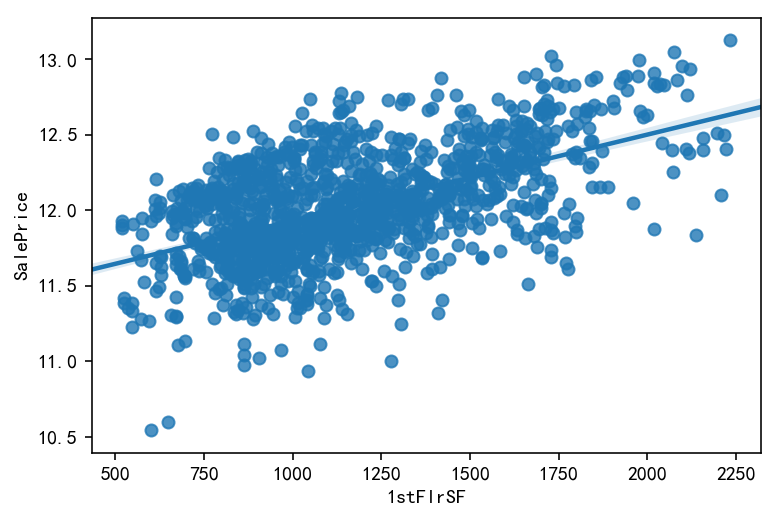

In [13]:
sns.regplot(x=df_train['1stFlrSF'], y=y_train)
plt.show()

In [14]:
df = pd.concat([df_train, df_test])
df.shape

(2790, 79)

下面这个处理比较粗糙，主要做了两件事：

1、填充缺失值；

2、正规化处理。

In [15]:
from sklearn.preprocessing import LabelEncoder
lblencoder = LabelEncoder()

for c in df.columns:
    df[c] = df[c].fillna(-1)
    if df[c].dtype == 'object':
        df[c] = lblencoder.fit_transform(list(df[c].values))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,4,65.0,8450,1,0,3,3,1,4,...,0,0,0,0,0,0,2,2008,9,4
1,20,4,80.0,9600,1,0,3,3,1,2,...,0,0,0,0,0,0,5,2007,9,4
2,60,4,68.0,11250,1,0,0,3,1,4,...,0,0,0,0,0,0,9,2008,9,4
3,70,4,60.0,9550,1,0,0,3,1,0,...,0,0,0,0,0,0,2,2006,9,0
4,60,4,84.0,14260,1,0,0,3,1,2,...,0,0,0,0,0,0,12,2008,9,4


数据归一化。

In [16]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler()
data = mmscaler.fit_transform(df)

/Users/liwei/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [17]:
train_num = y_train.shape[0]
X_train = data[:train_num]
X_test = data[train_num:]

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [19]:
y_pred

array([11.71062057, 12.06700484, 12.07168929, ..., 11.99728155,
       11.72161755, 12.35211071])

In [20]:
y_pred = np.expm1(y_pred)

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in expm1
  """Entry point for launching an IPython kernel.


In [21]:
y_pred

array([121858.07915621, 174032.80562838, 174849.97047212, ...,
       162311.95170917, 123205.55682627, 231447.04825077])

In [22]:
submission = pd.DataFrame({'Id': ids, 'SalePrice': y_pred})
submission.head()
submission.to_csv('../output/submission-2019-05-15.csv', index=False)